### Notebook for Figure 3
This notebook was used to generate the panels in Figure 3 from: 

**metapredict: a fast, accurate, and easy-to-use cross-platform predictor of consensus disorder**
<br>Ryan J. Emenecker, Daniel Griffith, and Alex S. Holehouse



In [92]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [33]:
import protfasta
import metapredict as meta

## Read in the data 
Code below reads in the data which in turn was obtained from the MobiDB server using the following syntax in the API request:

    # PGL-3
    https://mobidb.bio.unipd.it/api/download?acc=G5EBV6&format=fasta

    # velo 1
    https://mobidb.bio.unipd.it/api/download?acc=Q7T226&format=fasta

    # sup35 (Pombe)
    https://mobidb.bio.unipd.it/api/download?acc=O74718&format=fasta

    # E1A (Human adenovirus C serotype 5)
    https://mobidb.bio.unipd.it/api/download?acc=P03255&format=fasta
    
Once downloaded, the `.fasta` were moved into this directory and re-named.

In [88]:
filenames = ['velo1','e1a','pgl3','sup35']

raw = {}
seqs = {}
consensus = {}
metapredict = {}

for f in filenames:
    
    # read in fasta file in an unconstrained way
    raw[f] = protfasta.read_fasta('%s_disorder.fasta'%(f), invalid_sequence_action='ignore')
    
    # get amino acid sequences based on fact protein sequence is always first in the FASTA
    # file
    seqs[f] = raw[f][list(raw[f].keys())[0]]
    
    # extract out each predicted disorder string of 1s and 0 and convert into an integer
    # list
    local_disorder = []
    for i in raw[f]:
        if i.split('|')[1].find('prediction-disorder') > -1:
            local_disorder.append([int(x) for x in raw[f][i]])

    # calculate consensus disorder as the mean of the 1s and 0s from all predictors across
    # the positions
    consensus[f]  = np.mean(np.array(local_disorder),0)
    
    # computer disorder in metapredict
    metapredict[f] = meta.predict_disorder(seqs[f])

            
        



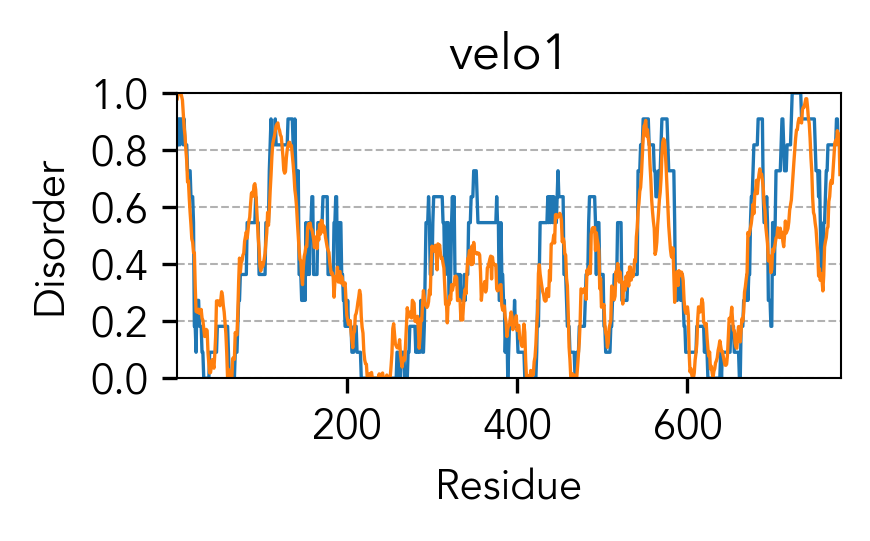

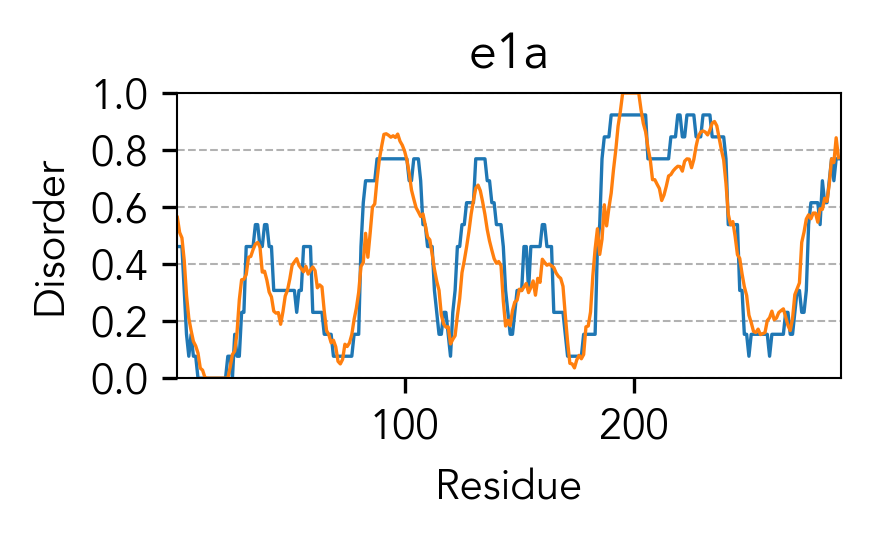

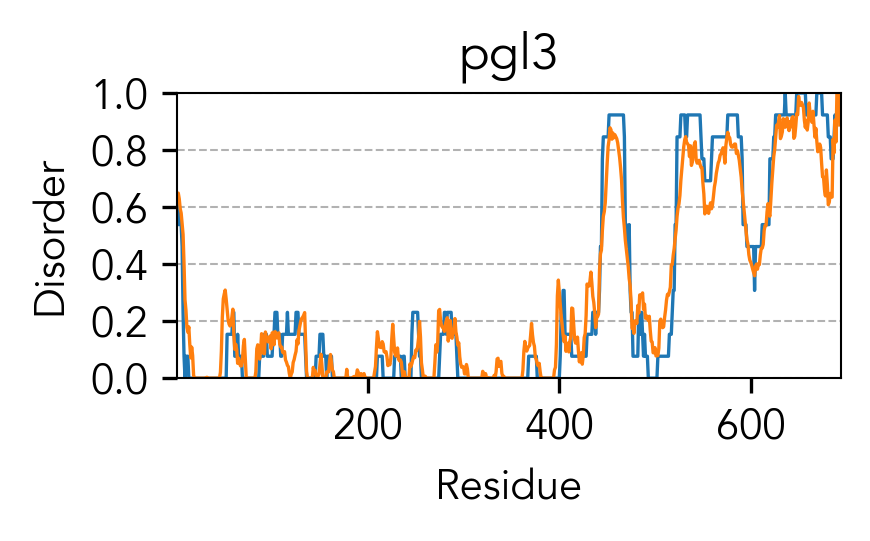

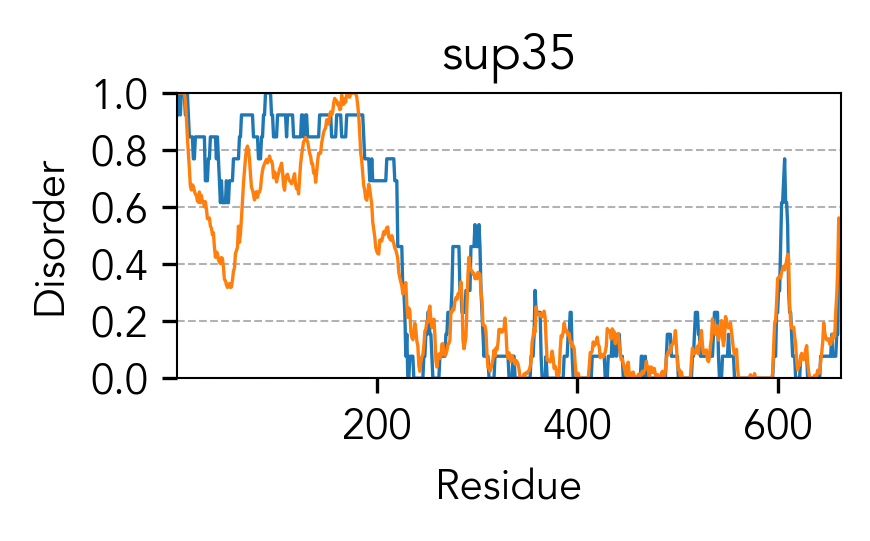

In [91]:
for f in filenames:
    figure(num=None, figsize=(3, 1.9), dpi=150, facecolor='w', edgecolor='k')
    ax = plt.gca()
    
    local_seq = seqs[f]
    residues = np.arange(1,len(local_seq)+1)
    
    plt.plot(residues, consensus[f], linewidth=0.8, label='consensus')
    plt.plot(residues, metapredict[f], linewidth=0.8, label='metapredict')


    
    plt.ylim([0,1])
    plt.xlim([1,len(local_seq)+1])
    plt.yticks([0,0.2,0.4,0.6,0.8,1.0])
    plt.grid(color='k',which='major', linestyle='--',linewidth=0.5, alpha=0.3, axis='y')
    

    
    plt.ylabel('Disorder')
    plt.xlabel('Residue')
    plt.title(f)
    plt.tight_layout()
    plt.savefig(f'{f}.pdf')

